In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
import copy
import os
import networkx as nx

ori = pd.read_excel(r'test4.xlsx')
Name = ori.iloc[:4,0]
xl = ori.iloc[:4,1]#序列
data = ori.iloc[:,3:]#其他信息

name = []
for i in range(len(Name)):
    name.append(Name.iloc[i][:])

In [4]:
path = "D:\\jupyter notebook files\\FAD\\pdb\\"

df_empty = pd.DataFrame()

for n in range(len(name)):    
    x = []
    y = []
    z = []
    NO_aminoacid = []
    for line in open(path + name[n] +'.pdb'):
        list = line.split()
        if list[0] == 'ATOM'or list[0] == 'HETATM':
            NO_aminoacid.append(list[5])
            x.append(float(list[6]))
            y.append(float(list[7]))
            z.append(float(list[8]))
    number_of_atom = len(x)
#计算子代的degree
    number_of_aminoacid = 1
    Rev_NO_aminoacid = [1]*number_of_atom
    for i in range(2,len(x)):
        if NO_aminoacid[i]!=NO_aminoacid[i-1]:
            number_of_aminoacid = number_of_aminoacid +1
            for j in range(i,len(x)):
                Rev_NO_aminoacid[j] = number_of_aminoacid
            
    contact = np.zeros((number_of_aminoacid, number_of_aminoacid)).astype('int64')
    for i in range(len(x)):
        for j in range(len(x)):
            if abs(Rev_NO_aminoacid[i]-Rev_NO_aminoacid[j]) > 1:
                a=[x[i],y[i],z[i]]
                b=[x[j],y[j],z[j]]
                X=np.vstack([a,b]) 
                d_ij = pdist(X)
                if d_ij <= 4.5 :
                    contact[Rev_NO_aminoacid[i]-1][Rev_NO_aminoacid[j]-1] = 1
    G=nx.Graph(contact)
#度中心性
    degree = []
    degree.extend(nx.degree_centrality(G).values())


#计算子代的位点
    son_of_site = []
    for i in range(len(contact)):
        site = []
        for j in range(len(contact)):
            if contact[i][j] == 1:
                site.append(j+1)
        son_of_site.append(site)
    
#计算子代的degree
    a1 = []
    for i in range(len(son_of_site)):
        b1 = []
        for j in range(len(son_of_site[i])):
            b1.append(degree[son_of_site[i][j]-1])
        a1.append(b1)
       
    
    degree_of_son = []
    for i in range(len(a1)):
        degree_of_son.append(sum(a1[i]))
    info_ = []
    for j in range(len(data)):
        if data.iloc[j,0] == Name[n]: 
            info_.append(data.iloc[j,6:])
    info = pd.DataFrame(info_)
    info.reset_index(drop = True,inplace = True)
    
    info2 = []
    for i in range(len(son_of_site)):
        info1 = []
        for j in range(len(son_of_site[i])):
            info1.append(info.loc[son_of_site[i][j]-1])
        info2.append(info1)
    
    info51 = []
    for i in range(len(info2)):
        info31 = []
        for j in range(len(info2[i])):
            for k in range(len(info2[i][j])):
                info31.append(info2[i][j][k] * a1[i][j])
        info51.append(info31)
    
    info7 = []
    for i in range(len(info51)):
        x1 = np.array(info51[i])
        x2 = int(len(x1)/46)
        x3 = np.reshape(x1, (x2,46))
        info7.append(np.sum(x3, axis=0))

    df_e = pd.DataFrame(info7)
    df_empty = pd.concat([df_empty,df_e],ignore_index=True)

In [5]:
df_empty.to_csv("1.csv", index=False)#
    

0         1         2         3         4         5         6   \
0    0.243070  0.377063  0.226105  0.098416  0.165652  0.345067  0.291100   
1    0.339996  0.441058  0.404324  0.316577  0.168584  0.552056  0.520619   
2    0.397422  0.504036  0.469365  0.422875  0.301712  0.506000  0.531795   
3    0.771771  0.761953  0.750455  0.490296  0.632118  0.784680  0.672899   
4    0.769832  0.628686  0.630938  0.441759  0.515677  0.564323  0.516774   
..        ...       ...       ...       ...       ...       ...       ...   
398  0.427856  0.354386  0.176150  0.306354  0.287873  0.267279  0.407993   
399  0.471850  0.463989  0.201560  0.318320  0.528293  0.283458  0.367055   
400  0.348805  0.434289  0.180652  0.317969  0.348345  0.331344  0.483513   
401  0.282381  0.394611  0.115248  0.191694  0.228266  0.222958  0.363467   
402  0.312576  0.421108  0.134817  0.179884  0.252826  0.273589  0.345274   

           7         8         9   ...        70        71        72  \
0    0.120035  0.310282  0.208498  ...  0.120095  0.292094  0.126763   
1    0.180187  0.469758  0.306222  ...  0.224587  0.426315  0.237262   
2    0.273034  0.503057  0.354127  ...  0.331118  0.450896  0.292968   
3    0.383279  0.853396  0.948695  ...  0.773401  0.540886  0.647851   
4    0.379091  0.714951  0.679917  ...  0.564967  0.501784  0.448174   
..        ...       ...       ...  ...       ...       ...       ...   
398  0.204984  0.281474  0.719287  ...  0.246197  0.200063  0.253255   
399  0.314183  0.474002  0.696668  ...  0.304486  0.317108  0.342560   
400  0.223650  0.305716  0.601436  ...  0.196256  0.181198  0.255196   
401  0.067321  0.220586  0.433934  ...  0.172525  0.161043  0.156241   
402  0.052789  0.181313  0.571611  ...  0.191274  0.133036  0.149118   

           73        74        75        76        77        78        79  
0    0.127939  0.107445  0.201953  0.267946  0.111607  0.152166  0.253001  
1    0.215112  0.196589  0.286577  0.289013  0.139919  0.237410  0.353839  
2    0.440809  0.286745  0.379280  0.390171  0.270683  0.526292  0.380609  
3    0.627410  0.414144  0.765279  0.725189  0.423941  0.593910  1.003279  
4    0.732640  0.361448  0.686489  0.621945  0.441270  0.691792  0.727682  
..        ...       ...       ...       ...       ...       ...       ...  
398  0.230427  0.078457  0.099029  0.171199  0.137168  0.155916  0.381095  
399  0.336956  0.164759  0.208608  0.184220  0.167568  0.182837  0.501462  
400  0.246153  0.048980  0.122300  0.144246  0.130801  0.174347  0.299486  
401  0.162757  0.061112  0.099891  0.146905  0.100060  0.078281  0.241971  
402  0.117157  0.019509  0.095863  0.141666  0.053415  0.055490  0.251064  

[403 rows x 80 columns]

[[0. 9. 2. 4. 7.]
 [0. 0. 3. 4. 0.]
 [0. 0. 0. 8. 4.]
 [0. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0.]]


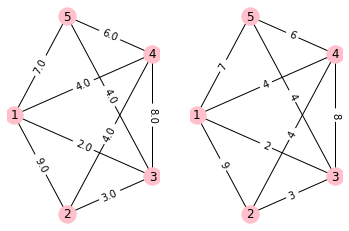